In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/qsar_aquatic_toxicity.csv', delimiter=';')
X, y = data[:,:-1], data[:,-1]

Cassotti got to cut outliers so i do too

In [3]:
from sklearn.neighbors import KDTree

In [4]:
from sklearn.neighbors import DistanceMetric

In [5]:
kd = KDTree(X)

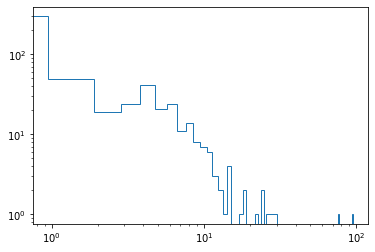

In [6]:
plt.hist([kd.query(X[i:i+1],k=2)[0][0,1] for i in range(len(X))], bins=100, histtype='step');
plt.yscale('log')
plt.xscale('log')

In [7]:
X.shape

(546, 8)

In [8]:
not_too_far = np.array([True if not x[0][0,1]>10 else False for x in [kd.query(X[i:i+1],2) for i in range(len(X))]])

In [9]:
np.array(sum(not_too_far) / X.shape[0]).round(3)

0.94

In [10]:
X, y = X[not_too_far], y[not_too_far]

In [11]:
with open('GPs.pkl', 'rb') as file:
    from pickle import load
    GPs = load(file)

In [12]:
GPs[:5],'', GPs[-5:]

([GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.16**2 * Matern(length_scale=[66.4, 202, 3.56, 13.2, 4.95, 2.21, 4.47, 3.81], nu=1.5) + 5.73**2 * WhiteKernel(noise_level=0.0181),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.16**2 * Matern(length_scale=[66.4, 202, 3.56, 13.2, 4.95, 2.21, 4.47, 3.81], nu=1.5) + 4.47**2 * WhiteKernel(noise_level=0.0297),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.42**2 * Matern(length_scale=[68.8, 171, 8.83, 11.5, 3.45, 2.59, 5.5, 9.97e+04], nu=1.5) + 0.253**2 * WhiteKernel(noise_level=10.6),
                           random_state=42),
  GaussianProcessRegressor(alpha=1e-05,
                           kernel=3.48**2 * Matern(length_scale=[73.4, 228, 4.53, 14.2, 6.49, 2.87, 4.84, 6.32e-05], nu=1.5) + 5.48**2 * WhiteKernel(noise_level=0.0205),
                           random_s

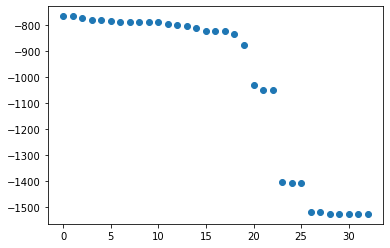

In [14]:
z = np.array([z.log_marginal_likelihood_value_ for z in GPs]);
plt.scatter(np.arange(len(z)), z)

In [15]:
z = GPs[0]

In [16]:
kernels = np.array([z.kernel_.theta for z in GPs])

In [17]:
kernels = np.array([2*np.max(kernels, 0), 2*np.min(kernels, 0)])

In [18]:
base_theta = .5*(kernels[0] - kernels[1])

In [19]:
M_i, N_i = 9, 10
M, N = 30, 30
Z = np.empty(shape=(M,N))
for i in range(M):
    for j in range(N):
        t = np.array(base_theta, copy=True)
        #print(t.round(2)[:3])
        t[M_i] = t[M_i] + i*(1./M) * (kernels[0][M_i]-kernels[1][M_i])
        t[N_i] = t[N_i] + j*(1./N) * (kernels[0][N_i]-kernels[1][N_i])
        #print(t.round(2)[:3])
        Z[i,j] = z.log_marginal_likelihood(theta=t)

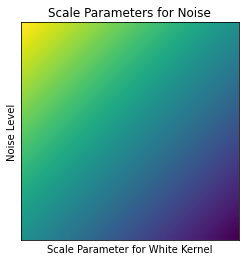

In [20]:
plt.imshow(Z, interpolation='bilinear')
plt.title('Scale Parameters for Noise')
plt.yticks([])
plt.ylabel('Noise Level')
plt.xlabel('Scale Parameter for White Kernel')
plt.xticks([]);
plt.savefig('lml2')

In [21]:
kernels = np.array([2*np.max(kernels, 0), 2*np.min(kernels, 0)])

In [22]:
base_theta = kernels[1]

In [23]:
M_i, N_i = 9, 10
M, N = 30, 30
Z = np.empty(shape=(M,N))
for i in range(M):
    for j in range(N):
        t = np.array(base_theta, copy=True)
        #print(t.round(2)[:3])
        t[M_i] = t[M_i] + i*(1./M) * (kernels[0][M_i]-kernels[1][M_i])
        t[N_i] = t[N_i] + j*(1./N) * (kernels[0][N_i]-kernels[1][N_i])
        #print(t.round(2)[:3])
        Z[i,j] = z.log_marginal_likelihood(theta=t)

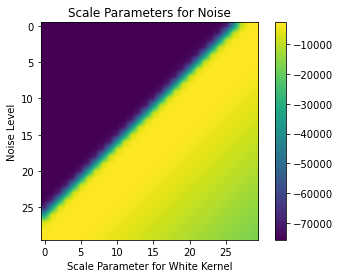

In [24]:
plt.imshow(Z, interpolation='bilinear')
plt.title('Scale Parameters for Noise')
#plt.yticks([])
plt.ylabel('Noise Level')
plt.colorbar()
plt.xlabel('Scale Parameter for White Kernel')
#plt.xticks([]);
plt.savefig('lml')

Corrections:
 * how did hgdl and the characteristics of hgdl help solve this problem better than it was solved before?
     * efficiency
         * more minimizations run - parallelism
         * minimizations in more useuful places
             * deflation
             * global method starting point
         * conclusion: spend more time looking at new areas of the likelihood - more minimizers run, minimizers run in useful place (better start, avoids minimum)
     * meta-analysis
         * many models found, can reason about many models

 * Show slices of posterior mean and variance
 * mark solutions that i find on the likelihood surface
 * connect with interpretations
 * mark figure 6 (models) with different colors for different models
 * remember to email funke